In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# use to plot QQ Plot

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [23]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])

In [24]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [25]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [26]:
df['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [27]:
df.isna().sum()

,0
Survived,0
Age,0
Fare,0


In [28]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [29]:
x= df.iloc[:,1:3]
y= df.iloc[:,0]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

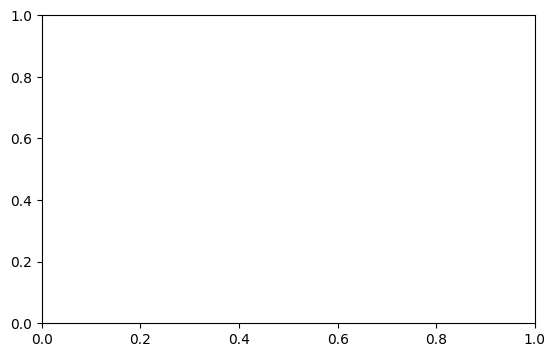

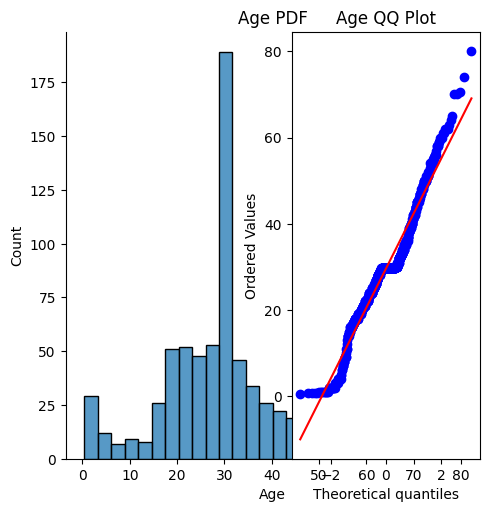

In [34]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.displot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)
plt.title('Age QQ Plot')

plt.show()

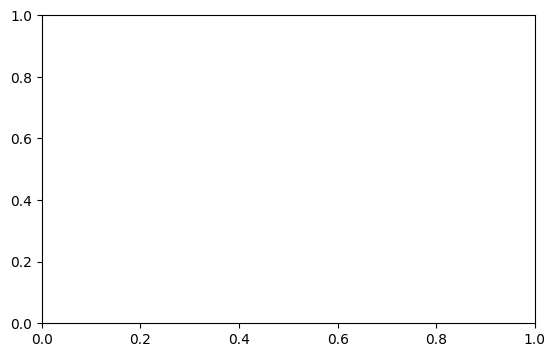

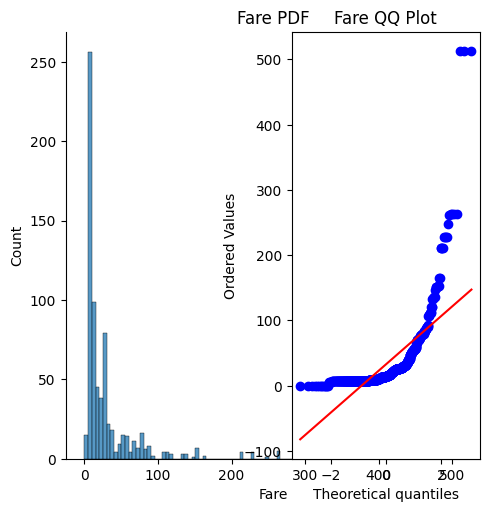

In [35]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)
plt.title('Fare QQ Plot')

plt.show()

In [36]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [37]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print('Logistic Regression Accuracy: ',accuracy_score(y_test,y_pred))
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy:  0.6480446927374302
Decision Tree Accuracy:  0.6759776536312849


In [38]:
trf = FunctionTransformer(func=np.log1p)

In [39]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transfored = trf.transform(x_test)

In [40]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transfored)
y_pred2 = clf2.predict(x_test_transfored)

print('Logistic Regression Accuracy: ',accuracy_score(y_test,y_pred))
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy:  0.6815642458100558
Decision Tree Accuracy:  0.6815642458100558


In [41]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT", np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577403245942571


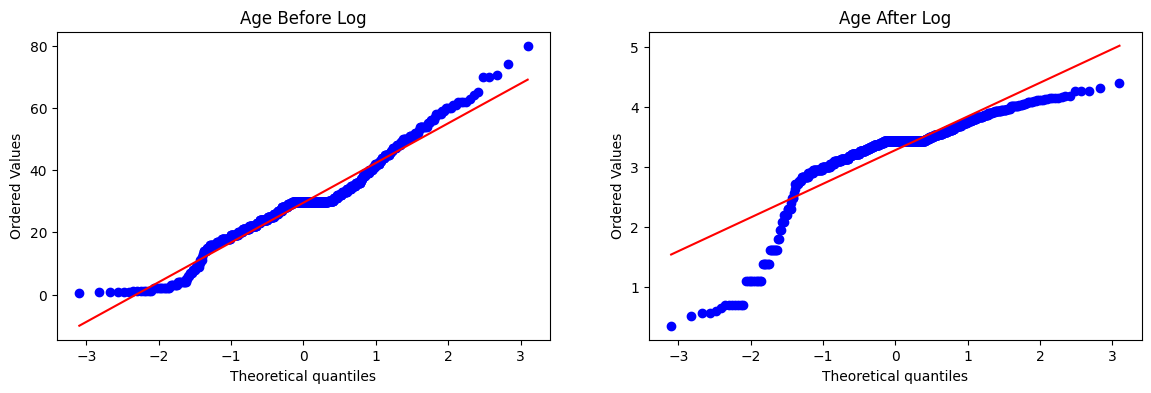

In [43]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist = 'norm', plot =plt)
plt.title('Age After Log')

plt.show()

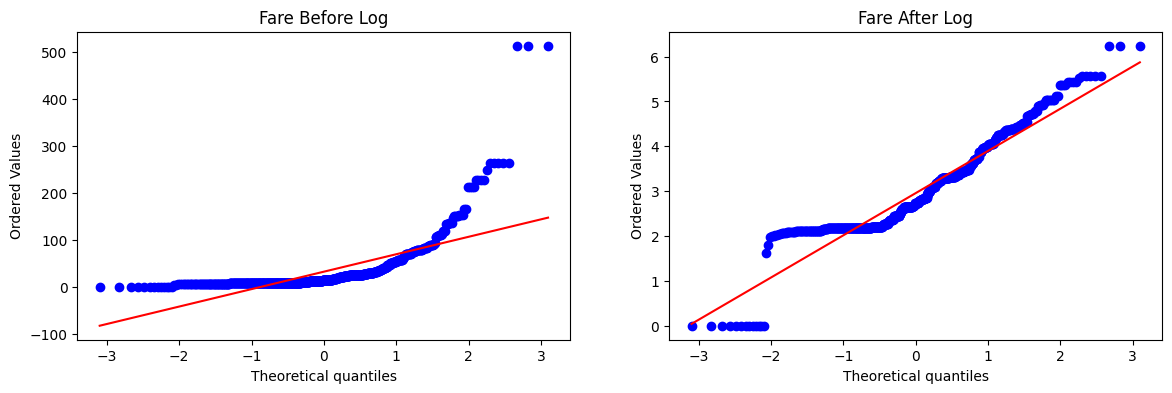

In [44]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist = 'norm', plot =plt)
plt.title('Fare After Log')

plt.show()

In [47]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
x_train_transformed2 = trf.fit_transform(x_train)
x_test_transformed2 = trf.transform(x_test)

In [48]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print('Logistic Regression Accuracy: ',accuracy_score(y_test,y_pred))
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy:  0.6815642458100558
Decision Tree Accuracy:  0.6815642458100558


In [49]:
x_transformed2 = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT", np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6678152309612984


In [50]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


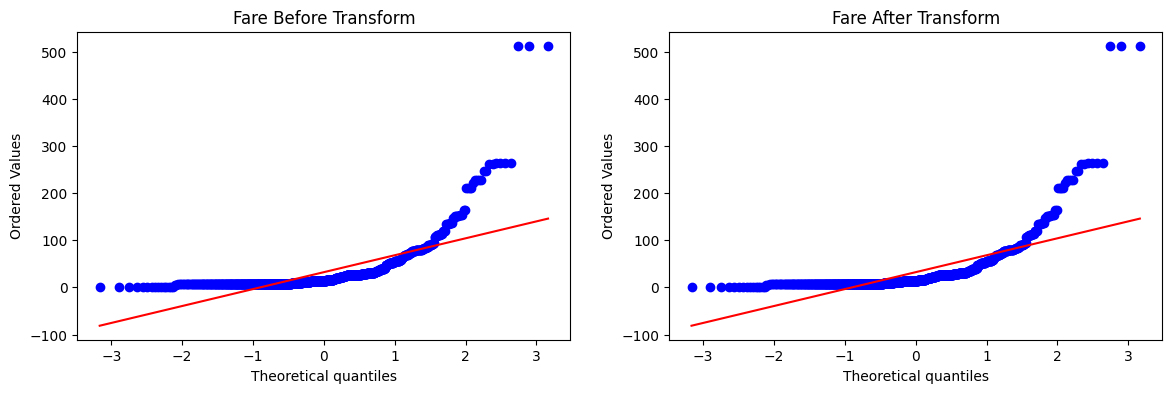

In [52]:

apply_transform(lambda x:x)

Accuracy 0.6431335830212235


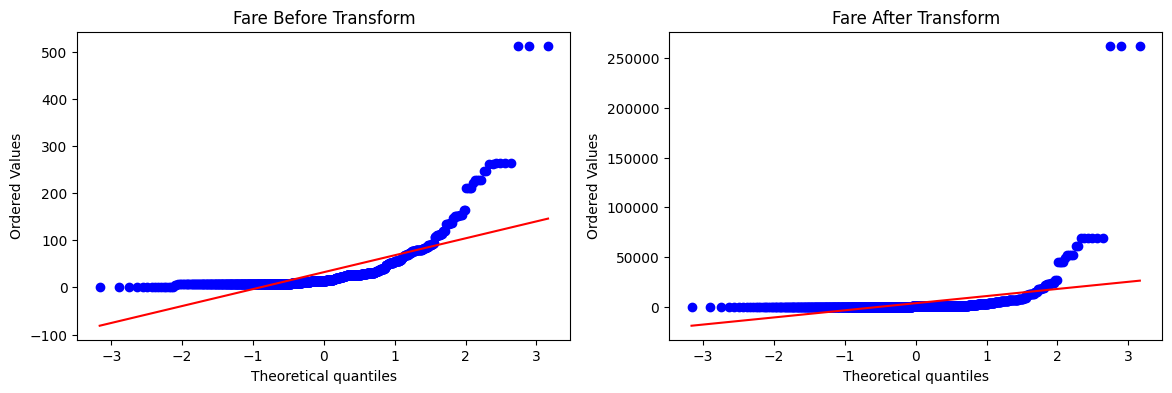

In [53]:
apply_transform(lambda x:x**2)

Accuracy 0.6589013732833957


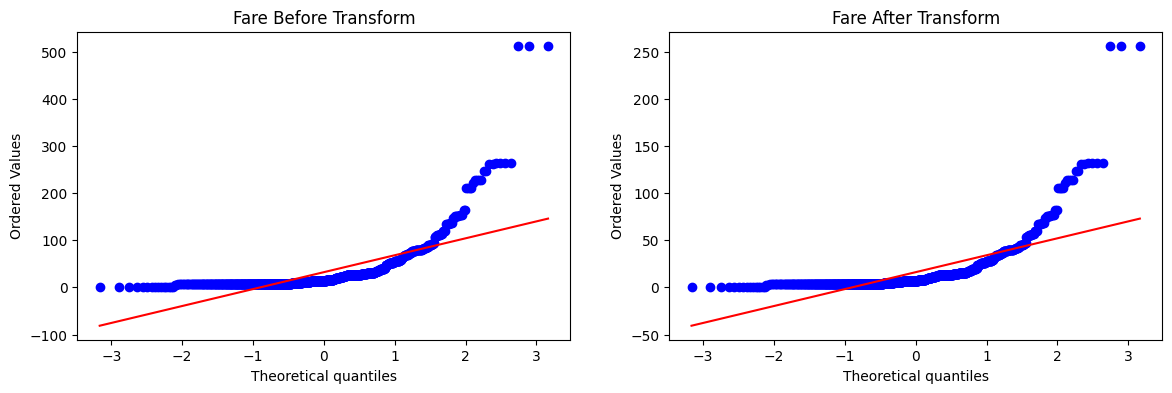

In [54]:
apply_transform(lambda x:x**1/2)

Accuracy 0.6589013732833957


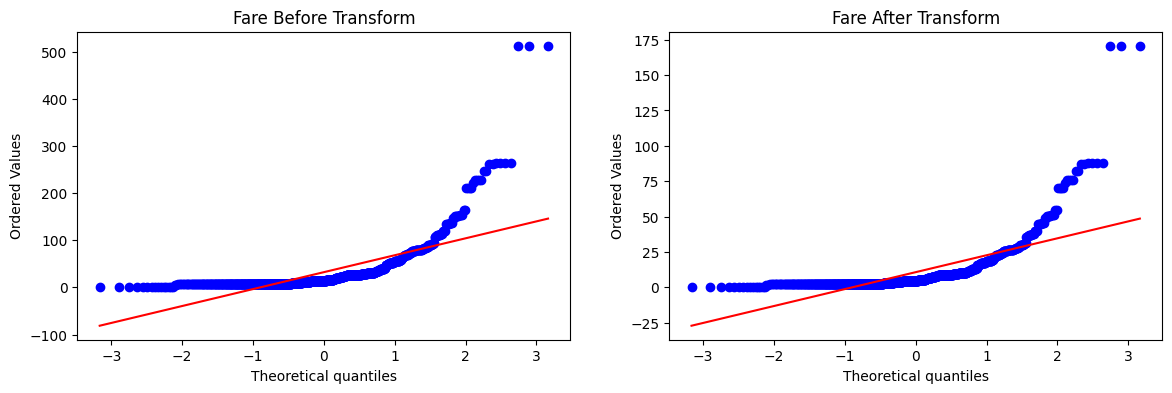

In [55]:
apply_transform(lambda x:x**1/3)

Accuracy 0.61729088639201


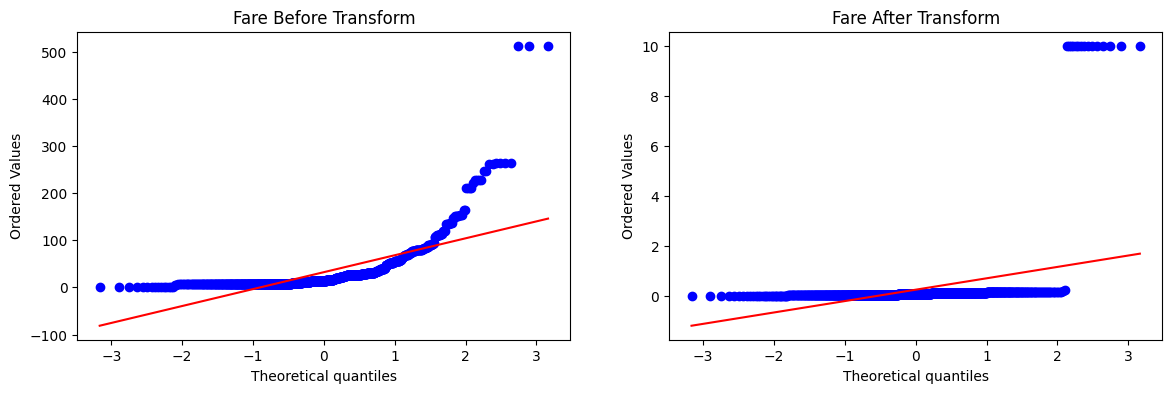

In [60]:
apply_transform(lambda x: (1/(x+0.1)))

Accuracy 0.6195131086142323


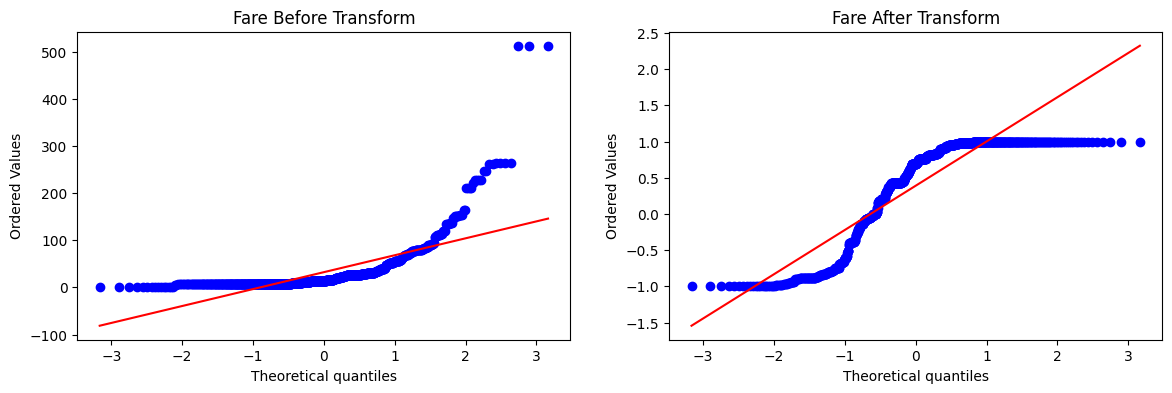

In [61]:
apply_transform(np.sin)